# Plot binding curves for specific variants
Copyright 2023 John Shin under GPL-3.0

Figure 2B come from this document.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import seaborn as sns

In [3]:
data_path='Data/'

In [4]:
single_df = pd.read_pickle(data_path+'single_mutant_df.pkl')
double_df = pd.read_pickle(data_path+'double_mutant_df.pkl')

wt_df = pd.read_pickle(data_path+'wt_df.pkl')
wt_df.head()


variant
seq          scaffold         
UAUGG_CCUAAG 13854       21164
             35600       27726
             35311_A     30312
             14073       23699
             14007       23519

In [5]:
CPvar = pd.concat((pd.read_csv(data_path+'fits/Mut2_GAAA_1_fmax.CPvariant',sep='\t'),
                   pd.read_csv(data_path+'fits/missing_Mut2_GAAA_1_fmax.CPvariant',sep='\t')))
CPvar.head()

,Unnamed: 0,fmax_init,dG_init,fmin_init,rsq_init,rmse_init,dG,dG_lb,dG_ub,fmax,fmax_lb,fmax_ub,fmin,rsq,rmse,num_iter,num_tests,fmax_enforced
0,287.0,1.203591,-8.642563,4.465742e-02,0.982099,0.095729,-8.802179,-9.408521,-8.219828,0.820898,0.820896,1.278939,0.046139,0.971968,0.066194,10000.0,36.0,0.0
1,291.0,0.613032,-11.411156,4.357904e-09,0.373106,0.235321,-9.913912,-12.578808,-6.659339,1.052981,0.204687,3.234337,0.046139,0.198551,0.386498,10000.0,1.0,1.0
2,295.0,1.122953,-8.427641,9.414911e-02,0.992901,0.038592,-8.798971,-9.332890,-8.269220,0.894089,0.787634,1.233679,0.046139,0.976136,0.052657,10000.0,28.0,0.0
3,309.0,1.481989,-8.618337,9.482153e-02,0.987474,0.053885,-9.154484,-9.693862,-8.404160,1.227728,1.027446,1.706441,0.046139,0.972398,0.072204,10000.0,13.0,0.0
4,316.0,1.075943,-8.272573,6.062330e-02,0.988342,0.051970,-8.095363,-8.808220,-7.489915,1.213017,0.859992,1.668552,0.046139,0.987922,0.052750,10000.0,24.0,1.0


In [6]:
CPser = pd.read_csv(data_path+'fits/Mut2_GAAA_1.CPseries',
                   sep='\t')
CPser.head()

,clusterID,0,1,2,3,4,5,6,7
0,M01339:539:000000000-BGYB5:1:1108:12223:24624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,M01339:539:000000000-BGYB5:1:1110:6308:13658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,M01339:539:000000000-BGYB5:1:2104:12390:12045,0.056557,0.052879,0.055530,0.053715,0.060366,0.084154,0.019972,0.266139
3,M01339:539:000000000-BGYB5:1:1114:9202:13615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,M01339:539:000000000-BGYB5:1:2110:6209:17377,0.045882,0.049467,0.036982,0.041387,0.027253,0.035843,0.035679,0.029407


In [7]:
CPannot = pd.read_csv(data_path+'fits/tecto_undetermined.CPannot',
                   sep='\t')
CPannot.head()

,clusterID,variant_number
0,M01339:539:000000000-BGYB5:1:1108:12223:24624,0.0
1,M01339:539:000000000-BGYB5:1:1110:6308:13658,0.0
2,M01339:539:000000000-BGYB5:1:2104:12390:12045,0.0
3,M01339:539:000000000-BGYB5:1:1114:9202:13615,0.0
4,M01339:539:000000000-BGYB5:1:2110:6209:17377,0.0


In [8]:
CPser = CPser.merge(CPannot,left_on='clusterID',right_on='clusterID')
CPser.head()

,clusterID,0,1,2,3,4,5,6,7,variant_number
0,M01339:539:000000000-BGYB5:1:1108:12223:24624,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,M01339:539:000000000-BGYB5:1:1110:6308:13658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,M01339:539:000000000-BGYB5:1:2104:12390:12045,0.056557,0.052879,0.055530,0.053715,0.060366,0.084154,0.019972,0.266139,0.0
3,M01339:539:000000000-BGYB5:1:1114:9202:13615,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,M01339:539:000000000-BGYB5:1:2110:6209:17377,0.045882,0.049467,0.036982,0.041387,0.027253,0.035843,0.035679,0.029407,0.0


In [12]:
def bindIsotherm(fmin,fmax,dG,conc):
    
    return fmin + fmax * conc/(conc+1e9*np.exp(dG/(1.987e-3*295)))

In [13]:
wt_variant = 21164

In [14]:
wt_CPvar = CPvar[CPvar['Unnamed: 0'] == wt_variant]
display(wt_CPvar.head())
wt_CPser = CPser[CPser['variant_number'] == wt_variant]
wt_CPser = wt_CPser.dropna()
wt_CPser.head()

,Unnamed: 0,fmax_init,dG_init,fmin_init,rsq_init,rmse_init,dG,dG_lb,dG_ub,fmax,fmax_lb,fmax_ub,fmin,rsq,rmse,num_iter,num_tests,fmax_enforced
53,21164.0,0.907082,-10.87346,0.490163,0.786532,0.14237,-12.089095,-12.267207,-11.929996,1.203558,0.99442,1.439789,0.046139,0.889726,0.078222,10000.0,42.0,0.0


,clusterID,0,1,2,3,4,5,6,7,variant_number
1919589,M01339:539:000000000-BGYB5:1:2116:23640:15558,0.592019,0.864073,0.997594,1.100204,1.364689,1.400877,1.820546,3.566897,21164.0
1919595,M01339:539:000000000-BGYB5:1:2109:14321:24609,0.418624,0.407793,0.517889,0.603378,0.763140,0.523857,0.966601,0.969269,21164.0
1919600,M01339:539:000000000-BGYB5:1:2103:8349:13217,0.648209,0.895519,1.063343,0.960078,1.320953,1.386032,1.461219,1.513624,21164.0
1919602,M01339:539:000000000-BGYB5:1:2109:20916:18636,0.039915,0.027394,0.013944,0.011384,0.027135,0.014857,0.168635,0.047196,21164.0
1919603,M01339:539:000000000-BGYB5:1:2118:22215:11018,0.981743,1.072517,1.567484,1.406864,1.609914,1.839361,1.595788,1.392164,21164.0


In [15]:
x_range = np.linspace(-3,9)
conc_range = 2000/(3**(8-x_range))

wt_y_range = bindIsotherm(wt_CPvar['fmin'].values,
                       wt_CPvar['fmax'].values,
                       wt_CPvar['dG'].values,
                       conc_range)
wt_y_upper = bindIsotherm(wt_CPvar['fmin'].values,
                       wt_CPvar['fmax_lb'].values,
                       wt_CPvar['dG_ub'].values,
                       conc_range)
wt_y_lower = bindIsotherm(wt_CPvar['fmin'].values,
                       wt_CPvar['fmax_ub'].values,
                       wt_CPvar['dG_lb'].values,
                       conc_range)

In [16]:
wt_plot_data = pd.melt(wt_CPser[[str(i) for i in range(8)]])

In [17]:
wt_CPvar

,Unnamed: 0,fmax_init,dG_init,fmin_init,rsq_init,rmse_init,dG,dG_lb,dG_ub,fmax,fmax_lb,fmax_ub,fmin,rsq,rmse,num_iter,num_tests,fmax_enforced
53,21164.0,0.907082,-10.87346,0.490163,0.786532,0.14237,-12.089095,-12.267207,-11.929996,1.203558,0.99442,1.439789,0.046139,0.889726,0.078222,10000.0,42.0,0.0


In [18]:
weak_variant = 21107

In [19]:
# x_range = np.linspace(-2,8)
# conc_range = 2000/(3**(7-x_range))

weak_CPvar = CPvar[CPvar['Unnamed: 0'] == weak_variant]


weak_y_range = bindIsotherm(weak_CPvar['fmin'].values,
                       weak_CPvar['fmax'].values,
                       weak_CPvar['dG'].values,
                       conc_range)
weak_y_upper = bindIsotherm(weak_CPvar['fmin'].values,
                       weak_CPvar['fmax_lb'].values,
                       weak_CPvar['dG_ub'].values,
                       conc_range)
weak_y_lower = bindIsotherm(weak_CPvar['fmin'].values,
                       weak_CPvar['fmax_ub'].values,
                       weak_CPvar['dG_lb'].values,
                       conc_range)

In [20]:
weak_CPser = CPser[CPser['variant_number'] == weak_variant].dropna()
weak_plot_data = pd.melt(weak_CPser[[str(i) for i in range(8)]])

In [21]:
wt_plot_data['x'] = wt_plot_data['variable'].apply(lambda x: {'0':0.91,'1':2.7,'2':8.2,'3':25,'4':74,'5':222,'6':666,'7':2000}[x])
weak_plot_data['x'] = weak_plot_data['variable'].apply(lambda x: {'0':0.91,'1':2.7,'2':8.2,'3':25,'4':74,'5':222,'6':666,'7':2000}[x])

In [22]:
medium_variant = 15369

In [23]:
# x_range = np.linspace(-2,8)
# conc_range = 2000/(3**(7-x_range))

medium_CPvar = CPvar[CPvar['Unnamed: 0'] == medium_variant]


medium_y_range = bindIsotherm(medium_CPvar['fmin'].values,
                       medium_CPvar['fmax'].values,
                       medium_CPvar['dG'].values,
                       conc_range)
medium_y_upper = bindIsotherm(medium_CPvar['fmin'].values,
                       medium_CPvar['fmax_lb'].values,
                       medium_CPvar['dG_ub'].values,
                       conc_range)
medium_y_lower = bindIsotherm(medium_CPvar['fmin'].values,
                       medium_CPvar['fmax_ub'].values,
                       medium_CPvar['dG_lb'].values,
                       conc_range)

In [24]:
medium_CPser = CPser[CPser['variant_number'] == medium_variant].dropna()
medium_plot_data = pd.melt(medium_CPser[[str(i) for i in range(8)]])

In [25]:
medium_plot_data['x'] = medium_plot_data['variable'].apply(lambda x: {'0':0.91,'1':2.7,'2':8.2,'3':25,'4':74,'5':222,'6':666,'7':2000}[x])

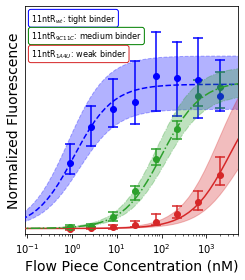

In [28]:
fig,ax = plt.subplots(figsize=(3.5,4))

sns.lineplot(data=wt_plot_data,x='x',y='value',ax=ax,color='w',
        ci=95,err_style='bars',estimator=np.nanmedian,
        err_kws={'capsize':5,'capthick':1.5,'marker':'o','ecolor':'blue','mec':'blue','mfc':'blue'})

ax.plot(conc_range,wt_y_range,color='blue',linestyle='--',zorder=10)
ax.fill_between(conc_range,wt_y_lower,wt_y_upper,color='blue',alpha=0.3,zorder=10,linestyle='--')



sns.lineplot(data=weak_plot_data,x='x',y='value',ax=ax,color='w',
        ci=95,err_style='bars',estimator=np.nanmedian,
        err_kws={'capsize':5,'capthick':1.5,'marker':'o','ecolor':'tab:red','mec':'tab:red','mfc':'tab:red'})

ax.plot(conc_range,weak_y_range,color='tab:red',zorder=10)
ax.fill_between(conc_range,weak_y_lower,weak_y_upper,color='tab:red',alpha=0.3,zorder=10)



sns.lineplot(data=medium_plot_data,x='x',y='value',ax=ax,color='w',
        ci=95,err_style='bars',estimator=np.nanmedian,
        err_kws={'capsize':5,'capthick':1.5,'marker':'o','ecolor':'tab:green','mec':'tab:green','mfc':'tab:green'})

ax.plot(conc_range,medium_y_range,color='tab:green',linestyle='-.',zorder=10)
ax.fill_between(conc_range,medium_y_lower,medium_y_upper,color='tab:green',alpha=0.3,zorder=10,linestyle='-.')




ax.set_yticks([])
ax.set_ylim([0,1.9])
ax.set_ylabel('Normalized Fluorescence',fontsize=14)

ax.set_xlim((0.09,5000))
ax.set_xscale('log')
ax.set_xlabel('Flow Piece Concentration (nM)',fontsize=14)


ax.text(.12,1.78,"11ntR$_{wt}$: tight binder",
        bbox={'edgecolor':'blue','facecolor':'white','boxstyle':'round'},
       fontsize=8)
ax.text(.12,1.63,"11ntR$_{9C11C}$: medium binder",
        bbox={'edgecolor':'green','facecolor':'white','boxstyle':'round'},
       fontsize=8)
ax.text(.12,1.48,"11ntR$_{1A4U}$: weak binder",
        bbox={'edgecolor':'tab:red','facecolor':'white','boxstyle':'round'},
       fontsize=8)

plt.tight_layout()

plt.savefig('Figures/binding_curves.svg',dpi=600,facecolor='white')
plt.show()

In [27]:
for v in [wt_variant,medium_variant,weak_variant]:

    display(CPvar[CPvar['Unnamed: 0'] == v][['dG','dG_lb','dG_ub','num_tests']])
    display(wt_df[wt_df['variant']==v])
    display(double_df[double_df['variant']==v])    

,dG,dG_lb,dG_ub,num_tests
53,-12.089095,-12.267207,-11.929996,42.0


,,variant
seq,scaffold,
UAUGG_CCUAAG,13854,21164


,,mutations,mutation_reorder_loc,mutation_res,loc_res,first_mut,second_mut,first_mut_loc,second_mut_loc,variant
,scaffold,,,,,,,,,


,dG,dG_lb,dG_ub,num_tests
575,-9.436733,-9.575376,-9.311021,70.0


,,variant
seq,scaffold,


,,mutations,mutation_reorder_loc,mutation_res,loc_res,first_mut,second_mut,first_mut_loc,second_mut_loc,variant
,scaffold,,,,,,,,,
UACGC_CCUAAG,13854,"[0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0]","[9, 11]","[C, C]","[9C, 11C]",C,C,9,11,15369


,dG,dG_lb,dG_ub,num_tests
1218,-7.398546,-7.710502,-7.139738,97.0


,,variant
seq,scaffold,


,,mutations,mutation_reorder_loc,mutation_res,loc_res,first_mut,second_mut,first_mut_loc,second_mut_loc,variant
,scaffold,,,,,,,,,
UAUGG_ACUUAG,13854,"[0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0]","[1, 4]","[A, U]","[1A, 4U]",A,U,1,4,21107
